In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = 999

In [2]:
df = pd.read_csv('./Data/team_stats_1980_2022.csv', index_col=0)
df.rename(columns = {'AST': 'Assists per game'}, inplace = True)
df.head()

,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,Rk,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,Assists per game,STL,BLK,TOV,PF,PTS,team_year,year
0,Boston Celtics,61,21,0.744,—,113.5,105.7,7.37,6.0,82,242.4,41.9,89.2,0.470,0.9,3.2,0.286,41.0,86.0,0.477,20.9,27.1,0.770,14.2,28.0,42.2,22.8,8.4,5.1,19.9,25.1,105.7,Boston Celtics_1980,1980
1,Philadelphia 76ers,59,23,0.720,2.0,109.1,104.9,4.04,4.0,82,242.1,42.0,92.2,0.455,0.9,3.4,0.271,41.1,88.8,0.463,20.0,26.2,0.765,16.1,28.7,44.8,25.5,10.7,4.7,19.0,25.6,104.9,Philadelphia 76ers_1980,1980
2,Washington Bullets,39,43,0.476,22.0,107.0,109.5,-2.27,13.0,82,242.4,44.1,94.8,0.465,0.7,2.6,0.262,43.4,92.2,0.471,20.7,26.6,0.777,14.6,32.6,47.2,25.9,9.0,6.3,14.9,23.2,109.5,Washington Bullets_1980,1980
3,New York Knicks,39,43,0.476,22.0,114.0,115.1,-0.96,20.0,82,241.2,45.2,91.4,0.495,0.7,2.4,0.278,44.5,89.0,0.501,24.0,31.2,0.770,15.8,29.7,45.4,26.1,9.9,4.8,20.7,24.9,115.1,New York Knicks_1980,1980
4,New Jersey Nets,34,48,0.415,27.0,108.3,109.5,-0.98,12.0,82,241.5,42.4,90.6,0.469,0.7,2.5,0.279,41.7,88.0,0.474,23.9,31.4,0.761,15.7,31.7,47.3,26.7,10.4,6.3,20.6,24.9,109.5,New Jersey Nets_1980,1980


In [3]:
#df.drop(columns = ['Team', 'team_year', 'year', 'GB'], inplace = True)

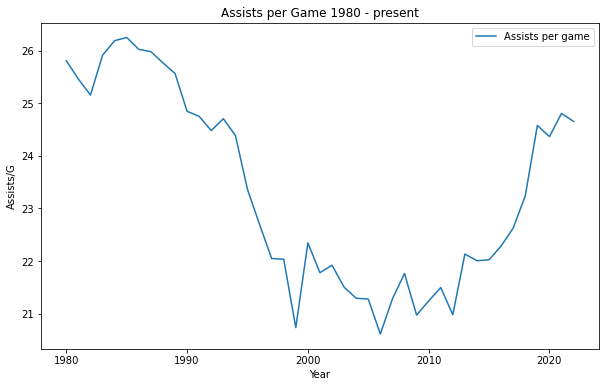

In [4]:
plt.figure(figsize = (10,6))
df.groupby('year')['Assists per game'].mean().plot(legend=True)
plt.ylabel('Assists/G')
plt.xlabel('Year')
plt.title('Assists per Game 1980 - present')
plt.savefig('./Visuals/Assists per game line chart');

In [5]:
df.groupby('year')['Assists per game'].mean().mean()

23.334306464573675

In [6]:
df.corr()['W/L%'].sort_values()

L                  -0.969563
Rk                 -0.542844
BLK                -0.329676
FG%                -0.328314
PA/G               -0.317101
2P%                -0.278054
TRB                -0.244459
Assists per game   -0.222914
PTS                -0.213463
DRB                -0.200572
STL                -0.194951
FT                 -0.194539
FTA                -0.193623
FG                 -0.160921
2P                 -0.106646
3P%                -0.093060
ORB                -0.041532
TOV                -0.012595
2PA                -0.011749
year               -0.001277
MP                  0.000437
FT%                 0.000695
FGA                 0.006935
3P                  0.008655
G                   0.011296
3PA                 0.016939
PF                  0.096361
PS/G                0.299090
SRS                 0.965517
W                   0.971195
W/L%                1.000000
Name: W/L%, dtype: float64

In [7]:
win_pct = df.corr()[['W/L%']]
win_pct.sort_values(by = 'W/L%')

,W/L%
L,-0.969563
Rk,-0.542844
BLK,-0.329676
FG%,-0.328314
PA/G,-0.317101
2P%,-0.278054
TRB,-0.244459
Assists per game,-0.222914
PTS,-0.213463
DRB,-0.200572


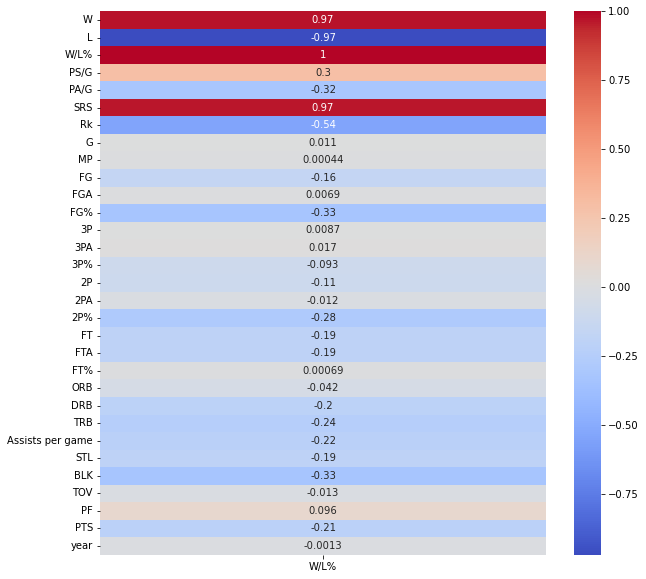

In [8]:
plt.figure(figsize = (10,10))
sns.heatmap(win_pct, annot = True, cmap = 'coolwarm');

### `Assists per game` has a low correlation (-.22) correlation to win%

In [9]:
df['Assists per game'].describe()

count    1194.000000
mean       23.185678
std         2.528448
min        16.300000
25%        21.300000
50%        23.100000
75%        25.000000
max        30.900000
Name: Assists per game, dtype: float64

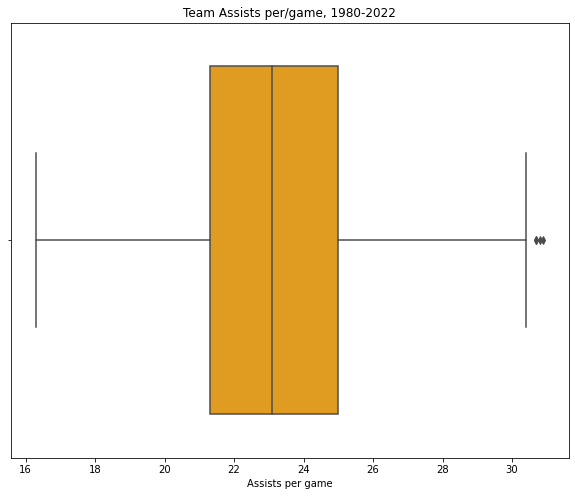

In [10]:
plt.figure(figsize = (10,8))
sns.boxplot(x = df['Assists per game'], color = 'orange')
plt.title('Team Assists per/game, 1980-2022')
plt.savefig('./Visuals/Assists per Game.png');

# the orange box represents the data that falls within the 25th to 75th percentile range.

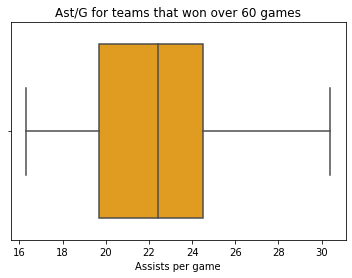

In [11]:
wins_60 = df.loc[(df['W'] > 60)]
sns.boxplot(x = wins_60['Assists per game'], color = 'orange')
plt.title('Ast/G for teams that won over 60 games');

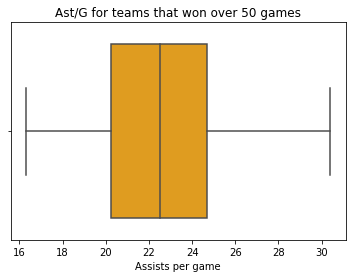

In [12]:
wins_50 = df.loc[(df['W'] > 50)]
sns.boxplot(x = wins_50['Assists per game'], color = 'orange')
plt.title('Ast/G for teams that won over 50 games');

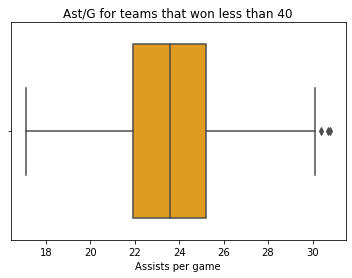

In [13]:
less_than_40 = df.loc[(df['W'] < 40)]
sns.boxplot(x = less_than_40['Assists per game'], color = 'orange')
plt.title('Ast/G for teams that won less than 40');

In [14]:
# over 25 assists per game means 75% percentile and up.  What win pct did those teams have? .477

over25 = df.loc[(df['Assists per game']>25)].copy()
over25['W/L%'].describe()

count    291.000000
mean       0.477787
std        0.155552
min        0.146000
25%        0.360000
50%        0.488000
75%        0.598000
max        0.890000
Name: W/L%, dtype: float64

### Teams that averaged over 25 assists per game (75th percentile in all teams in this dataset) had a collective win% of .477, slightly below average.  

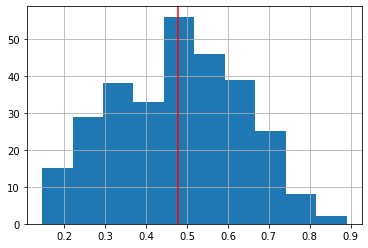

In [15]:
over25['W/L%'].hist()
plt.axvline(over25['W/L%'].mean(), color = 'r')

In [16]:
# under 21 assists per game means 25% percentile and below.  What win pct did those teams have? .589

under21 = df.loc[(df['Assists per game'] < 21)].copy()
under21['W/L%'].describe()

count    234.000000
mean       0.589449
std        0.125499
min        0.207000
25%        0.512000
50%        0.610000
75%        0.680000
max        0.878000
Name: W/L%, dtype: float64

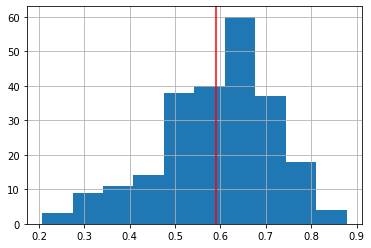

In [17]:
under21['W/L%'].hist()
plt.axvline(under21['W/L%'].mean(), color = 'r')

In terms of assists per game, the teams in the 25th percentile and below averaged a winning percent of .589 (winning ~48 games).  Contrastly, teams in the 75% percentile and above averaged a winning pct of .477 (winning ~39 games).  Averaging LESS assists per game historically has led to a higher winning percentage.  

Now, assists are not passes.  So I'm hesitant to say "passing more does not lead to winning more".  But filtering to the best regular season teams of the last 40 years, you can see the average assists per game are lower.  These 13 teams (the cream of the crop!) averaged 22 assists/g, below the historical average of 23.3.  

In [18]:
df.loc[(df['W'] > 65)]

,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,Rk,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,Assists per game,STL,BLK,TOV,PF,PTS,team_year,year
0,Boston Celtics,67,15,0.817,—,114.1,104.7,9.06,3.0,82,242.1,42.0,91.2,0.461,1.0,3.7,0.270,41.0,87.5,0.469,19.7,26.4,0.748,13.3,28.3,41.5,23.5,8.8,4.2,15.3,24.0,104.7,Boston Celtics_1986,1986
7,Chicago Bulls,67,15,0.817,—,109.9,99.5,10.07,3.0,82,241.8,39.1,85.0,0.460,2.7,8.0,0.332,36.4,77.0,0.473,18.6,24.2,0.768,13.2,26.5,39.7,22.5,7.7,4.3,15.7,22.0,99.5,Chicago Bulls_1992,1992
7,Chicago Bulls,72,10,0.878,—,105.2,92.9,11.80,2.0,82,240.6,35.1,78.4,0.448,5.3,15.2,0.350,29.8,63.2,0.472,17.4,24.2,0.717,12.0,26.0,38.0,19.4,7.3,3.8,17.1,22.6,92.9,Chicago Bulls_1996,1996
7,Chicago Bulls,69,13,0.841,—,103.1,92.3,10.70,6.0,82,240.6,35.3,81.1,0.436,5.7,17.2,0.335,29.6,64.0,0.463,15.9,21.6,0.737,13.3,26.9,40.2,19.7,7.6,3.5,15.8,21.1,92.3,Chicago Bulls_1997,1997
22,Los Angeles Lakers,67,15,0.817,—,100.8,92.3,8.41,6.0,82,241.5,34.6,83.2,0.416,4.5,13.9,0.326,30.1,69.3,0.434,18.5,24.9,0.742,12.3,30.9,43.1,19.5,7.6,4.2,14.6,25.6,92.3,Los Angeles Lakers_2000,2000
25,Dallas Mavericks,67,15,0.817,—,100.0,92.8,7.28,4.0,82,240.9,34.0,76.1,0.447,4.6,13.1,0.349,29.5,63.0,0.467,20.2,27.0,0.746,10.2,27.9,38.1,17.9,6.9,3.8,14.5,22.1,92.8,Dallas Mavericks_2007,2007
0,Boston Celtics,66,16,0.805,—,100.5,90.3,9.30,2.0,82,240.9,32.4,77.3,0.419,5.9,18.7,0.316,26.5,58.6,0.452,19.6,26.3,0.743,11.0,27.9,38.9,18.8,7.2,4.7,16.0,22.2,90.3,Boston Celtics_2008,2008
5,Cleveland Cavaliers,66,16,0.805,—,100.3,91.4,8.68,1.0,82,241.2,33.8,78.6,0.431,5.9,17.6,0.333,28.0,60.9,0.459,17.8,23.1,0.770,10.7,28.2,38.9,19.1,6.3,4.1,13.9,20.3,91.4,Cleveland Cavaliers_2009,2009
10,Miami Heat,66,16,0.805,—,102.9,95.0,7.03,5.0,82,242.4,35.6,80.9,0.440,7.6,21.7,0.350,28.0,59.1,0.473,16.2,21.2,0.766,11.2,28.9,40.1,20.2,7.9,3.2,15.6,20.4,95.0,Miami Heat_2013,2013
20,Golden State Warriors,67,15,0.817,—,110.0,99.9,10.01,15.0,82,240.6,37.0,86.4,0.428,7.2,21.4,0.337,29.7,65.0,0.458,18.7,24.5,0.763,11.7,32.8,44.5,21.0,8.3,3.6,16.2,18.8,99.9,Golden State Warriors_2015,2015


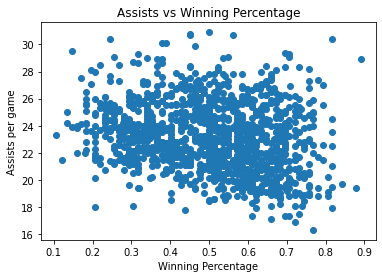

In [19]:
plt.scatter(x = df['W/L%'], y = df['Assists per game'])
plt.ylabel('Assists per game')
plt.xlabel('Winning Percentage')
plt.title('Assists vs Winning Percentage');

# No linear relationship between assists per game and winning pct.  

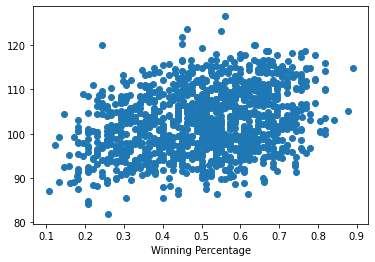

In [20]:
plt.scatter(x = df['W/L%'], y = df['PS/G'])
plt.xlabel('Winning Percentage');

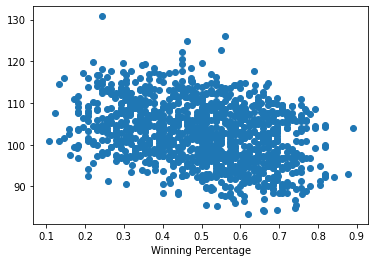

In [21]:
plt.scatter(x = df['W/L%'], y = df['PA/G'])
plt.xlabel('Winning Percentage');

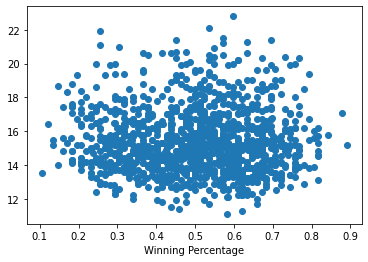

In [22]:
plt.scatter(x = df['W/L%'], y = df['TOV'])
plt.xlabel('Winning Percentage');